In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import linear_model as lm
from sklearn import model_selection as ms
from sklearn.datasets import fetch_openml

In [ ]:
# https://medium.com/analytics-vidhya/a-guide-to-using-logistic-regression-for-digit-recognition-with-python-codes-86aae6da10fe
# https://stackoverflow.com/questions/24638059/runtimewarning-overflow-encountered-in-np-expx2
# https://satishgunjal.com/multiclass_lr_sklearn/

In [11]:
def sigmoid(z):
    val = 1/(1 + np.exp(-np.longfloat(z)))
    return val

In [12]:
def costFunctionReg(theta, x, y, lmbda):
    m = len(y);
    temp1 = np.multiply(y, np.log(sigmoid(np.dot(x, theta.T))))
    temp2 = np.multiply(1-y, np.log(1 - sigmoid(np.dot(x, theta.T))))
    
    cost = (-1/m) * np.sum(temp1 + temp2)
    reg = (lmbda/(2*m)) * np.sum(np.multiply(theta[1:], theta[1:]))
    return cost + reg

In [13]:
def gradRegularized(theta, x, y, lmbda):
    grad = sigmoid(np.dot(x, theta.T)) - y
    grad = (1/m) * np.dot(grad.T, x)
    grad[1:] += (lmbda/m) * theta[1:]
    return grad

In [2]:
dataset = fetch_openml('mnist_784')

In [5]:
x = np.array(dataset['data'])
y = np.array(dataset['target'], dtype='int32')

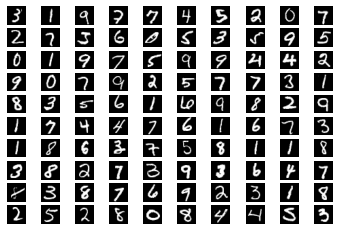

In [6]:
# a sneak peek on the data we are about to deal with
_, axes = plt.subplots(10, 10)
for i in range(10):
    for j in range(10):
        axes[i][j].imshow(x[np.random.randint(x.shape[0])].reshape(28, 28), cmap='gray')
        axes[i][j].axis('off')

In [7]:
tot_classes = 10 # 10 discrete values from 1 to 10
lmbda = 0.1

x = np.hstack((np.ones((x.shape[0], 1)), x)) # adding the intercept term
m, n = x.shape # m = size of dataset; n = size of feature vector (28 x 28) + 1(intercept term that we added)
theta = np.zeros((tot_classes, n))

In [8]:
# splitting the data (into 75% and 25%) to train and test the model
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.25, random_state=1)

In [14]:
for i in range(tot_classes):
    y_digit = np.array((y_train == i), dtype='int32')
    theta[i] = opt.fmin_cg(f=costFunctionReg, x0=theta[i],
                           fprime=gradRegularized, args=(x_train, y_digit, lmbda), maxiter=100)

<ipython-input-12-49b2d531e7dc>:4: RuntimeWarning: divide by zero encountered in log
  temp2 = np.multiply(1-y, np.log(1 - sigmoid(np.dot(x, theta.T))))
<ipython-input-12-49b2d531e7dc>:4: RuntimeWarning: invalid value encountered in multiply
  temp2 = np.multiply(1-y, np.log(1 - sigmoid(np.dot(x, theta.T))))


         Current function value: 0.021802
         Iterations: 100
         Function evaluations: 189
         Gradient evaluations: 189
         Current function value: 0.020424
         Iterations: 100
         Function evaluations: 195
         Gradient evaluations: 195
         Current function value: 0.067906
         Iterations: 100
         Function evaluations: 200
         Gradient evaluations: 200
         Current function value: 0.082615
         Iterations: 100
         Function evaluations: 199
         Gradient evaluations: 199
         Current function value: 0.045952
         Iterations: 100
         Function evaluations: 194
         Gradient evaluations: 194
         Current function value: 0.080092
         Iterations: 100
         Function evaluations: 209
         Gradient evaluations: 209
         Current function value: 0.038957
         Iterations: 100
         Function evaluations: 193
         Gradient evaluations: 193
         Current function value: 0.045230

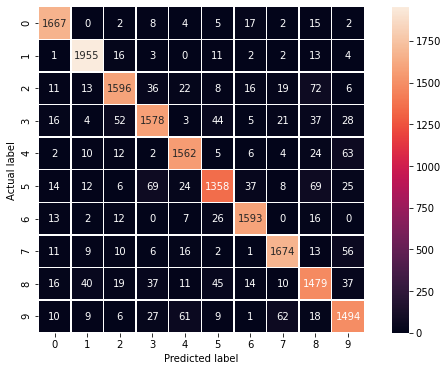

In [24]:
pred = np.argmax(np.dot(x_test, theta.T), axis=1)
cm = metrics.confusion_matrix(y_test, pred)

import seaborn as sn
plt.figure(figsize=(10, 6))
sn.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.savefig('/home/jedi/Downloads/f_mincg.png')

In [20]:
# plt.imshow(x_test[randInt][1:].reshape(28, 28), cmap='gray')
# print(y_test[randInt])
# print(np.argmax(np.dot(x_test[randInt], theta.T)))

pred = np.argmax(np.dot(x_test, theta.T), axis=1)
accuracy = np.mean((pred == y_test)) * 100
print(accuracy)

91.17714285714285


In [4]:
model = lm.LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(x_train, y_train)

/home/jedi/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9114285714285715

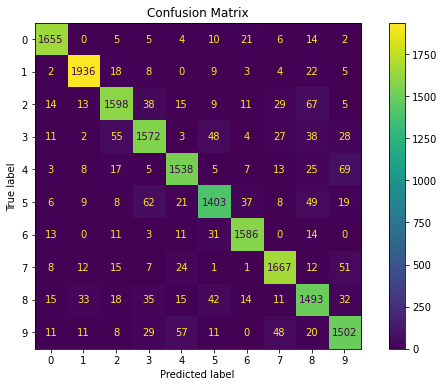

In [16]:
fig, axes = plt.subplots(figsize=(10, 6))
axes.set_title('Confusion Matrix')

target_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
_ = metrics.plot_confusion_matrix(model, x_test, y_test, display_labels=target_names, ax=axes)

In [22]:
print('accuracy:', model.score(x_test, y_test) * 100)
print()
print(metrics.classification_report(y_test, model.predict(x_test)))

accuracy: 91.14285714285715

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1722
           1       0.96      0.96      0.96      2007
           2       0.91      0.89      0.90      1799
           3       0.89      0.88      0.89      1788
           4       0.91      0.91      0.91      1690
           5       0.89      0.86      0.88      1622
           6       0.94      0.95      0.95      1669
           7       0.92      0.93      0.92      1798
           8       0.85      0.87      0.86      1708
           9       0.88      0.89      0.88      1697

    accuracy                           0.91     17500
   macro avg       0.91      0.91      0.91     17500
weighted avg       0.91      0.91      0.91     17500

